#mporting the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics

#Reading the data

In [3]:
df = pd.read_csv(r"cul_cat1.csv",index_col=[0])
df.head()

,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,...,log_width_fitb,log_high_freq,log_low_freq,log_peak_freq,log_fre_width,log_redshift,log_in_duration,log_energy,log_luminosity,log_T_B
0,FRB20180725A,180725.J0613+67,non-repeater,93.42,67.07,21.29,716.6,0.0,2.7,0.0,...,-3.528708,2.880871,2.686010,2.783475,2.654057,-0.193318,-0.743748,40.451471,43.284176,29.741595
1,FRB20180727A,180727.J1311+26,non-repeater,197.72,26.42,85.60,642.1,0.0,1.9,0.0,...,-2.856985,2.903199,2.602277,2.693111,2.810184,-0.211253,-0.065109,40.075391,42.683330,29.418756
2,FRB20180729A,180729.J1316+55,non-repeater,199.40,55.58,61.16,108.4,0.0,4.6,0.0,...,-4.000000,2.840545,2.602277,2.720655,2.467101,-2.648161,-1.000975,36.029529,38.868241,26.685375
3,FRB20180729B,180729.J0558+56,non-repeater,89.93,56.50,15.68,318.6,0.0,0.9,0.0,...,-3.503070,2.903199,2.645226,2.817896,2.617914,-0.802538,-0.566616,38.696017,41.644170,28.500531
4,FRB20180730A,180730.J0353+87,non-repeater,57.39,87.19,25.11,849.2,3.3,2.3,6.1,...,-3.329754,2.880356,2.602277,2.684396,2.810947,-0.095607,-0.585606,41.368382,43.908874,30.178429


#Choosing the data

In [4]:
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cd = df[col]
#scaler = StandardScaler()
scale = cd#scaler.fit_transform(cd)
cf_scale = pd.DataFrame(scale, columns = col)
cf_scale.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B
0,607.4,0.469822,0.230449,0.612784,0.640740,450.875425,-0.743748,40.451471,43.284176,29.741595
1,493.3,0.469822,-0.236572,0.363612,0.614818,645.927163,-0.065109,40.075391,42.683330,29.418756
2,525.6,-0.008774,1.068186,1.230449,0.002248,293.157605,-1.000975,36.029529,38.868241,26.685375
3,657.5,0.294466,-0.036212,0.079181,0.157566,414.871625,-0.566616,38.696017,41.644170,28.500531
4,483.5,0.691965,0.716003,1.431364,0.802405,647.063272,-0.585606,41.368382,43.908874,30.178429


#t-SNE(t-distributed Stochastic Neighbor Embedding) Method

In [6]:
from sklearn.manifold import TSNE
per=int(np.sqrt(cf_scale.shape[0]))
tsne = TSNE(n_components=2, learning_rate='auto',init='random',perplexity=per,n_iter=1000,random_state=45)
pca_cf = pd.DataFrame(data = tsne.fit_transform(cf_scale.values), columns = ['x','y'])
pca_cf['repeater']=df['repeater_name'].copy()
print(per)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


24


<ipython-input-41-eb7eec11908c>:7: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)


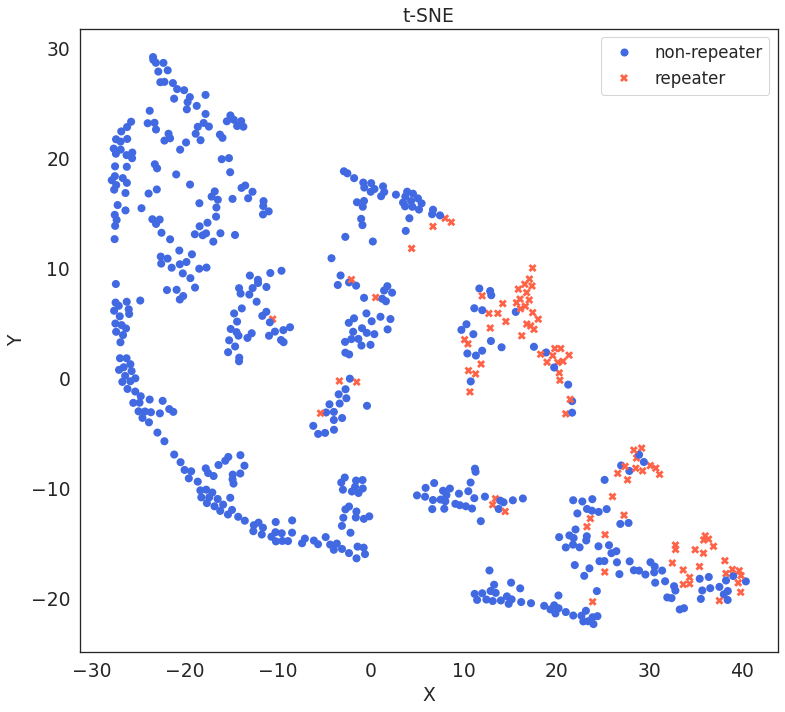

In [41]:
p=12
fs=18
s=5*p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue='repeater',style='repeater',data=pca_cf,linewidth=0,palette=color,s=s)
plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)
plt.title('t-SNE',fontsize=18)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.show()

#HDBSCAN(Hierarchical Density-Based Spatial Clustering of Applications with Noise) clustering method

In [10]:
pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.9 MB/s eta 0:00:00


In [12]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [42]:
import hdbscan
import unml
labels = hdbscan.HDBSCAN(#20 10
    min_cluster_size=32,
    min_samples=2,
).fit_predict(pca_cf.loc[:,['x','y']])
print(np.max(labels))

6


In [24]:
import unml
TSNE_HD=pca_cf.loc[:,['x','y']]
TSNE_HD['labels']=labels
n_labels,nrp_lb,oth_lb,rp_lb=unml.ML_label(labels=TSNE_HD['labels'],observe=df['repeater_name'],threshold=0.2,test=True)
print([nrp_lb,oth_lb,rp_lb])

0         0.0
1         0.0
2    0.029412
3     0.09375
4    0.103448
5    0.294118
6     0.66129
Name: rp_ratio, dtype: object
[array([0, 1]), array([2, 3, 4]), array([5, 6])]


/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]
/content/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

<ipython-input-26-7b0b9a750221>:13: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(labels=lg,


Text(0, 0.5, 'Y')

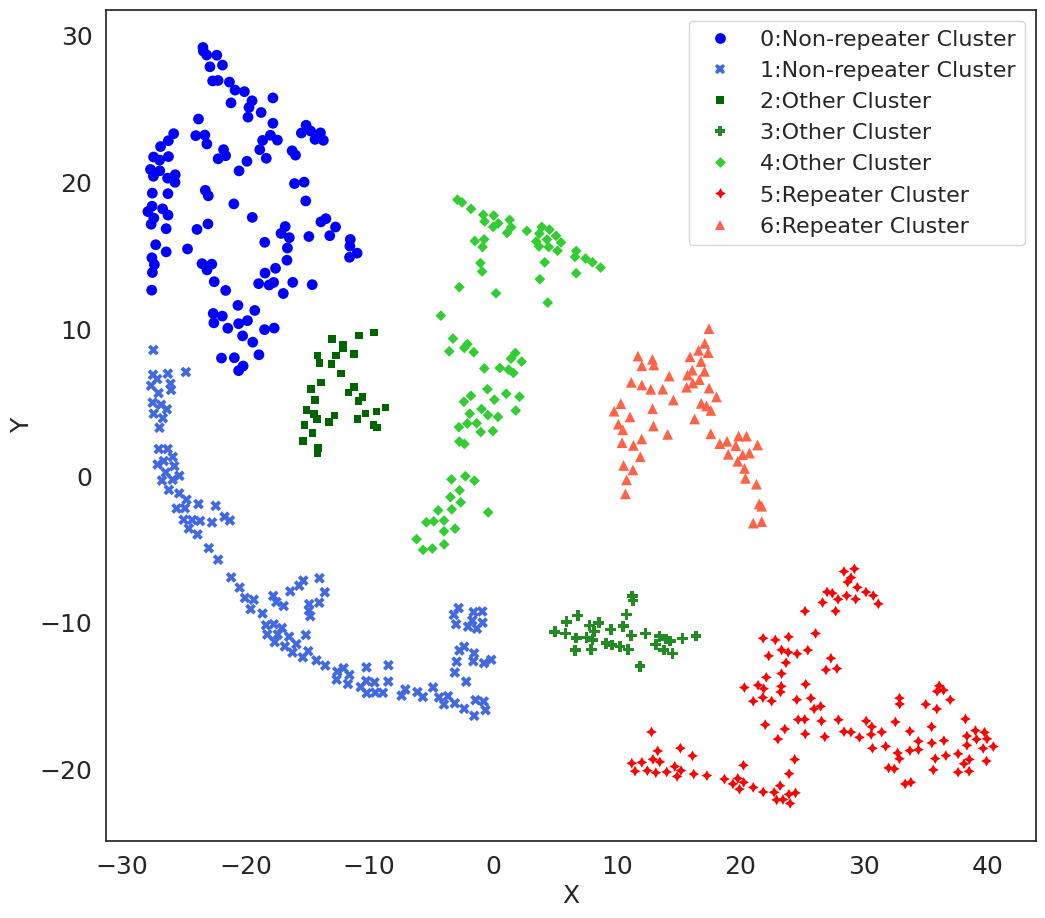

In [26]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})

TSNE_HD['labels']=n_labels
color=['blue','royalblue',#'cornflowerblue',#'lightskyblue',
       'darkgreen','forestgreen','limegreen',#'palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.scatterplot(x='x',y='y',hue = 'labels',data=TSNE_HD,legend='full',linewidth=0,palette=color,style='labels',s=s)#'viridis_r'
lg=(['_']+[str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])
plt.legend(labels=lg,
           loc='best',fontsize=fs-2)
plt.tick_params(labelsize=fs)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)

In [27]:
pca_cf['HDBSCAN_c']=n_labels
pca_cf['HDBSCAN']=np.zeros(len(n_labels))
for i in range(len(pca_cf['HDBSCAN_c'].values)):
    if (pca_cf.loc[i,'HDBSCAN_c'] in rp_lb):
        pca_cf.loc[i,'HDBSCAN']=1#repeater
    elif(pca_cf.loc[i,'HDBSCAN_c'] in nrp_lb):
        pca_cf.loc[i,'HDBSCAN']=-1#non-repeater
pca_cf.head()

,x,y,repeater,HDBSCAN_c,HDBSCAN
0,-0.448038,5.904637,non-repeater,4,0.0
1,-19.832630,10.575487,non-repeater,0,-1.0
2,11.311349,-8.488964,non-repeater,3,0.0
3,2.315777,7.788385,non-repeater,4,0.0
4,-20.548374,10.368378,non-repeater,0,-1.0


#Mutual Information

In [29]:
pip install umap-learn

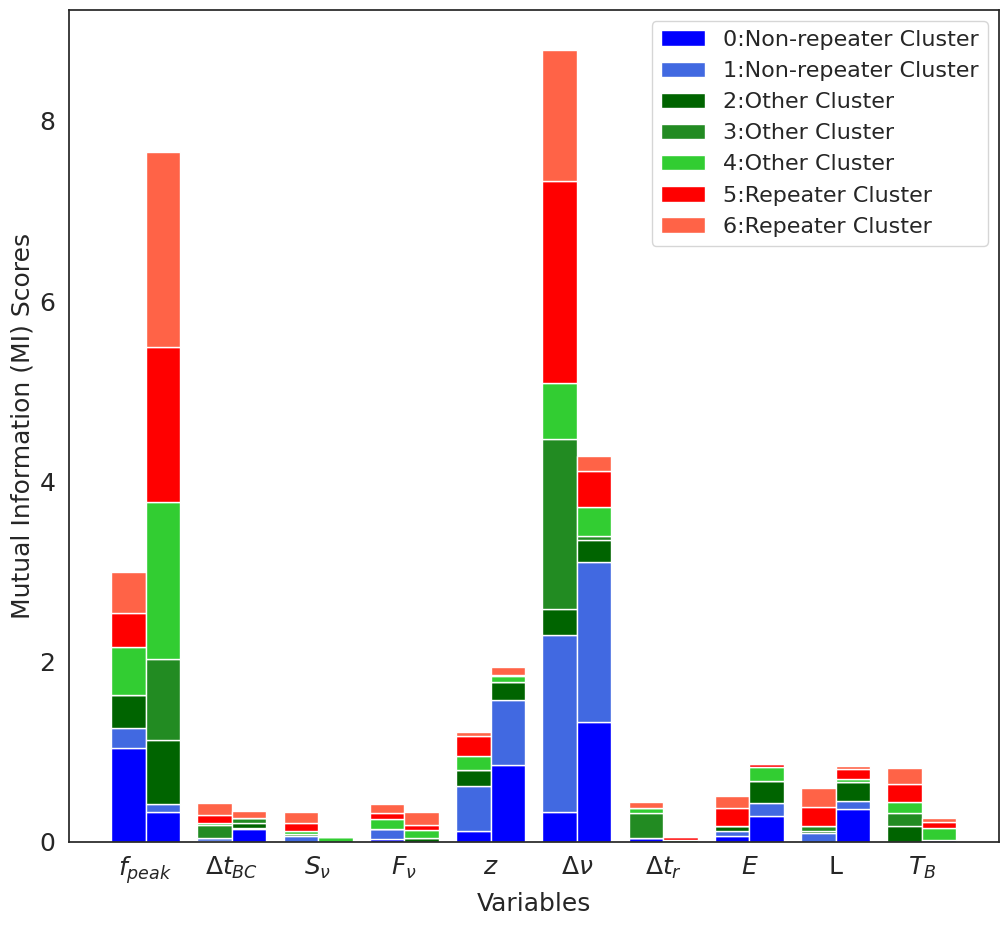

In [31]:
from unml import get_mi_score

p=12
colx=[r'$f_{peak}$',r'$\Delta t_{BC}$',r'$S_{\nu} $',r'$F_{\nu} $',r'$z$',r'$\Delta \nu$',r'$\Delta t_r$',r'$E$',r'L',r'$T_B$']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(col))
fig,ax=plt.subplots()

lgf=([str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cf_scale,label=i,embedding=pca_cf[['x','y']],labels_list=n_labels,axis='x')
    if(i==np.min(n_labels)):
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i])
        bt=mi_score['x']
    else:
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['x'].values

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cf_scale,label=i,embedding=pca_cf[['x','y']],labels_list=n_labels,axis='y')
    if(i==np.min(n_labels)):
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i])
        bt=mi_score['y']
    else:
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['y'].values

ax.legend(lgf,loc='best',fontsize=fs-2)
plt.tick_params(labelsize=fs)
ax.set_xlabel('Variables',fontsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores',fontsize=fs)
ax.set_xticks(x)
ax.set_xticklabels(colx)
plt.show()

#analysis

In [32]:
col=['peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B']
colx=['Peak Frequency','Boxcar Width','Flux','Fluence','Redshift','Frequency Width','Rest-frame Width','Energy','Luminosity','Brightness Temperature']
dfpl=df.loc[:,col]
dfpl['label']=n_labels
dfpl.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B,label
0,607.4,0.469822,0.230449,0.612784,0.640740,450.875425,-0.743748,40.451471,43.284176,29.741595,4
1,493.3,0.469822,-0.236572,0.363612,0.614818,645.927163,-0.065109,40.075391,42.683330,29.418756,0
2,525.6,-0.008774,1.068186,1.230449,0.002248,293.157605,-1.000975,36.029529,38.868241,26.685375,3
3,657.5,0.294466,-0.036212,0.079181,0.157566,414.871625,-0.566616,38.696017,41.644170,28.500531,4
4,483.5,0.691965,0.716003,1.431364,0.802405,647.063272,-0.585606,41.368382,43.908874,30.178429,0


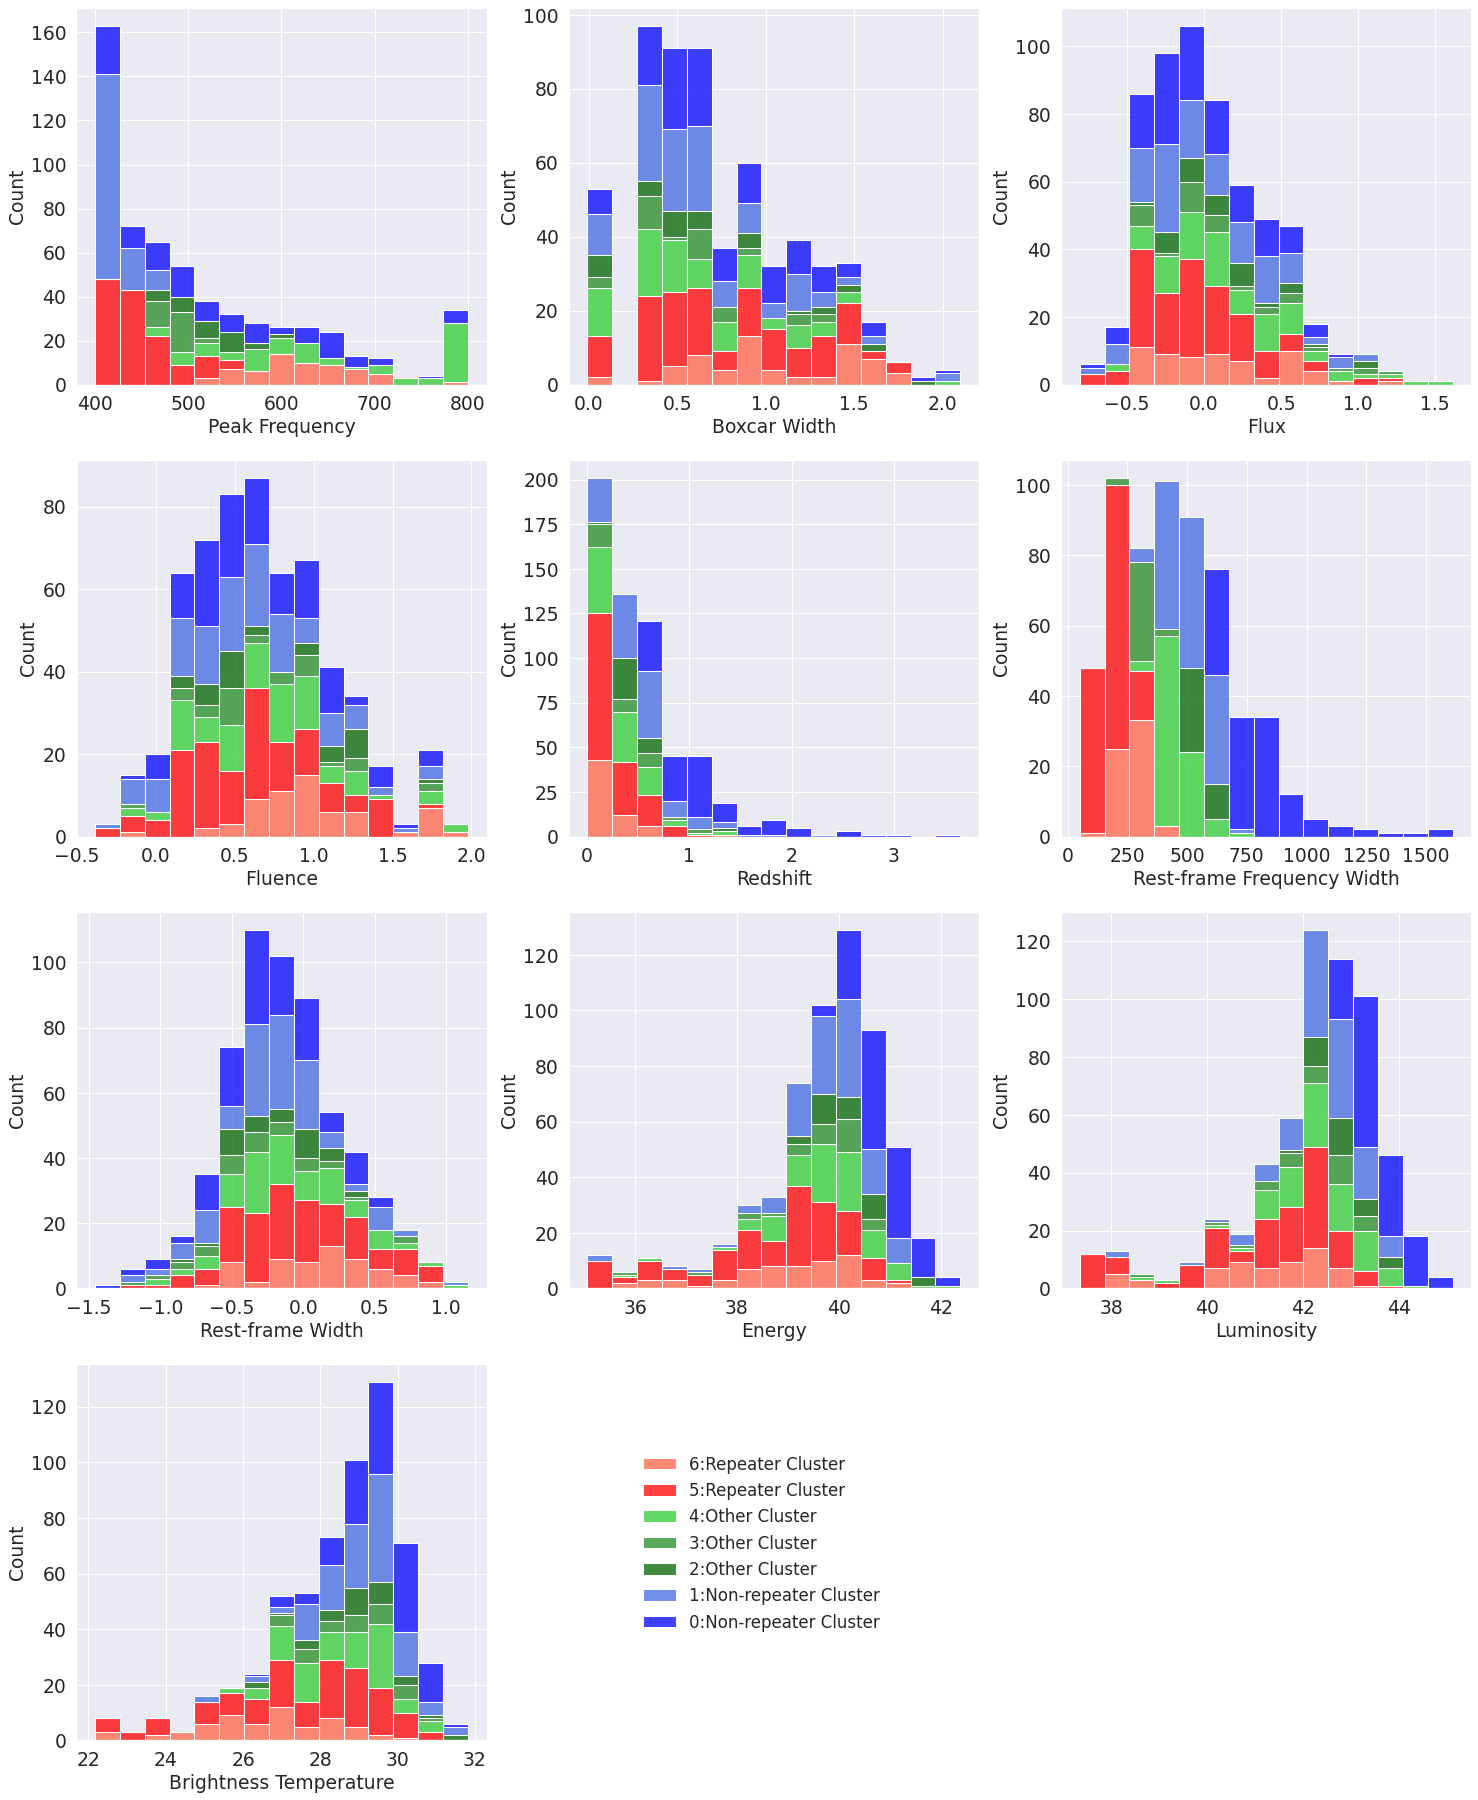

In [40]:
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')
p=24
figure = plt.figure(figsize=(p,1.25*p))
colx=['Peak Frequency','Boxcar Width','Flux','Fluence','Redshift','Rest-frame Frequency Width','Rest-frame Width','Energy','Luminosity','Brightness Temperature']
for i in range(len(col)):
    ax=plt.subplot(int((len(col)-1)/3)+1,3,i+1)
    sns.histplot(data=dfpl,x=col[i],hue='label',bins=15,
                 palette=color,#'deep',#viridis',
                 legend=None,
                 multiple='stack',
                 #element="step"
                 )
    plt.xlabel(colx[i],fontsize=fs)
    plt.ylabel('Count',fontsize=fs)
    plt.tick_params(labelsize=fs)

lg=([str(i)+':Non-repeater Cluster' for i in nrp_lb]+[str(i)+':Other Cluster' for i in oth_lb]+[str(i)+':Repeater Cluster' for i in rp_lb])
figure.legend(lg[::-1],loc=[0.43,0.09],frameon=False,shadow=False,fontsize=fs-2)
plt.show()

In [35]:
tf=df.loc[dfpl.loc[:,'label']==5,['peak_freq','fre_width_ob']]
tf.head()

,peak_freq,fre_width_ob
9,400.2,186.2
12,464.2,118.1
21,400.2,136.1
26,400.2,199.7
28,400.2,127.2


# HDBSCAN

In [38]:
frb=pd.concat([df[['tns_name','repeater_name']],pca_cf[['HDBSCAN']]],axis=1)
frb.columns=['tns_name','repeater','T-SNE_HDBSCAN']
frb.head()

,tns_name,repeater,T-SNE_HDBSCAN
0,FRB20180725A,non-repeater,0.0
1,FRB20180727A,non-repeater,-1.0
2,FRB20180729A,non-repeater,0.0
3,FRB20180729B,non-repeater,0.0
4,FRB20180730A,non-repeater,-1.0


In [39]:
frb.to_csv(r't-SNE_result.csv',index=False)